# Exploratory task:

We have taken bitcoin pricing as our dataset as there has been a surge in the investors since the pandemic started due to various reasons like:

1. Increase in the number of investors in the market.
2. People investing their unspent money during pandemic beacuse their expenditures got lower.
3. Shortage of bitcoins available in the market

So we decided on inferring hypothesis between the covid cases and the bitcoin price. If they had a effect on each other during the 2020 pandemic period.

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [411]:
#%cd D:\StonyBrook\Study\Prob&Stats CSE544\Project

from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My Drive/Prob_stats_proj

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Prob_stats_proj


In [412]:
bitcoin_price_data = pd.read_csv('bitcoin_pricing.csv')
us_all_covid_data = pd.read_csv('US_confirmed_totals.csv')

In [413]:
## converting date column to datetime data type ##
bitcoin_price_data['Date'] = pd.to_datetime(bitcoin_price_data['Date'])
us_all_covid_data['Date'] = pd.to_datetime(us_all_covid_data['Date'])

In [414]:
us_all_covid_data

,Date,Confirmed cases cumulative,Confirmed cases
0,2020-01-22,1,0
1,2020-01-23,1,0
2,2020-01-24,2,1
3,2020-01-25,2,0
4,2020-01-26,5,3
...,...,...,...
433,2021-03-30,29796319,52741
434,2021-03-31,29863536,67217
435,2021-04-01,29947899,84363
436,2021-04-02,30014206,66307


In [415]:
bitcoin_price_data

,Date,Closing Price,Change
0,2013-10-01,123.655,0.000
1,2013-10-02,125.455,1.800
2,2013-10-03,108.585,-16.870
3,2013-10-04,118.675,10.090
4,2013-10-05,121.339,2.664
...,...,...,...
2776,2021-05-08,58788.210,1681.089
2777,2021-05-09,58102.191,-686.019
2778,2021-05-10,55715.547,-2386.644
2779,2021-05-11,56573.555,858.008


In [416]:
# data.info()

** Covid confirmed cases plot from 2020-03-15 to 2020-12-31 **


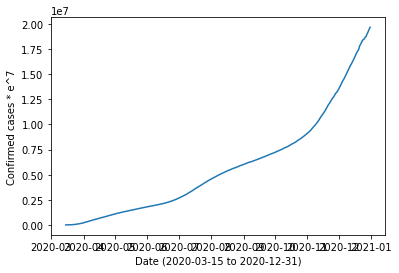

** Bit coin price plot from 2020-03-15 to 2020-12-31 **


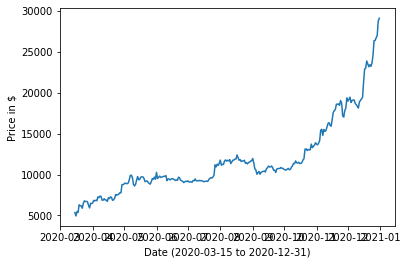

In [417]:
# Create three months data objs in here

#### June - July 2020 data ######
march_august_start_date, march_august_end_date = '2020-03-15' , '2020-12-31' # March 01 ,2020 to 31st August 2020

condition = (bitcoin_price_data['Date'] >= march_august_start_date) & (bitcoin_price_data['Date'] <= march_august_end_date)
march_august_bitcoin_price_data = bitcoin_price_data.loc[condition] 

condition = (us_all_covid_data['Date'] >= march_august_start_date) & (us_all_covid_data['Date'] <= march_august_end_date)
march_august_covid_data = us_all_covid_data.loc[condition] 

print("** Covid confirmed cases plot from 2020-03-15 to 2020-12-31 **" )
plt.plot(march_august_covid_data['Date'], march_august_covid_data['Confirmed cases cumulative'])
plt.xlabel('Date (2020-03-15 to 2020-12-31)')
plt.ylabel('Confirmed cases * e^7')
plt.show()

print("** Bit coin price plot from 2020-03-15 to 2020-12-31 **" )
plt.plot(march_august_bitcoin_price_data['Date'], march_august_bitcoin_price_data['Closing Price'])
plt.xlabel('Date (2020-03-15 to 2020-12-31)')
plt.ylabel('Price in $')
plt.show()

## Walds - 2 Sample test

delta = normalized_growth_of_cases - normalized_growth_of_bitcoin_value

Null Hypothesis : delta = 0 i.e. if the growth rate of bitcoin was proportional to the confirmed covid cases growth

Alternate Hypothesis : delta != 0 if the growth rate of bitcoin was not proportional to the confirmed covid cases growth

w_stat = delta_hat/ SE_hat(delta_hat)

alpha = 0.05
z_alpha/2 = 1.96

Procedure: The growth rate of covid cases and bitcoin during the period is normalised to show how the values changed from the start of period to the end of period. This graphs are plotted below to see the comparision. Then the two sided walds test is performed to check if their rate of growth was similar during the period.



** Normalised growth graphs for Covid cases and bitcoin price between dates 2020-03-15 and 2020-12-31 **


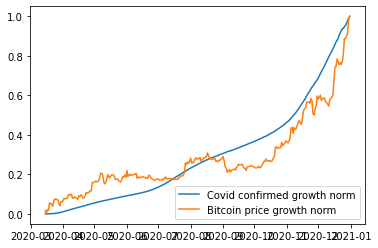

 Standard Error Estimate 0.01860144411111878
 Delta Estimate  0.015573072250839148
 w_stat  0.8371969486783308


In [418]:
## Walds - 2 sample test ##

handle = 'Confirmed cases cumulative'
test_handle = 'Closing Price'

march_august_covid_data_norm = (march_august_covid_data[handle] - np.min(march_august_covid_data[handle])) / ( np.max(march_august_covid_data[handle]) - np.min(march_august_covid_data[handle]) )

march_august_bitcoin_price_data_norm = (march_august_bitcoin_price_data[test_handle] - np.min(march_august_bitcoin_price_data[test_handle])) / ( np.max(march_august_bitcoin_price_data[test_handle]) - np.min(march_august_bitcoin_price_data[test_handle]) )

print("** Normalised growth graphs for Covid cases and bitcoin price between dates 2020-03-15 and 2020-12-31 **" )
plt.plot(march_august_covid_data['Date'], march_august_covid_data_norm, label = 'Covid confirmed growth norm')
plt.plot(march_august_bitcoin_price_data['Date'], march_august_bitcoin_price_data_norm, label = 'Bitcoin price growth norm')
plt.legend(loc="lower right")
plt.show()

mean_x = np.mean(march_august_covid_data_norm)
mean_y = np.mean(march_august_bitcoin_price_data_norm)

delta_hat = np.abs(mean_x - mean_y )

SE_hat = np.sqrt( (np.var(march_august_covid_data_norm) / np.shape(march_august_covid_data_norm)[0]) + (np.var(march_august_bitcoin_price_data_norm) / np.shape(march_august_bitcoin_price_data_norm)[0]) )

w_stat = np.abs(delta_hat/SE_hat)

print(' Standard Error Estimate', SE_hat)
print(' Delta Estimate ',delta_hat )
print(' w_stat ', w_stat)

# Accept null hypothesis as w is less than 1.96

Result: On performing 2 sided walds test. We obtained a result w_statistic of 0.837. As we have considered the value of alpha as 0.05, so Z_alpha would be 1.96. 
As w_stat is less that 1.96.
We accept the null hypothesis H0.

## K-S test

Then we decided to check of the per day new covid cases and the each day value change of bitcoin had any particular distribution match on a daily basis i.e. if more covid cases in a day would result in rise of bitcoin pricing.

So to check if the both followed the same distribution. We ploted the cdf of both the distributions and done the 2 sample KS test for alpha 0.05.

Null hypothesis H0 :  Confirmed covid cases distribution equals bitcoin price change distributionn 

Alternate hypothesis H1: Confirmed covid cases distribution not equals bitcoin price change distributionn 

In [419]:
#Functions required for K-s test
def get_eCDF(X):
    n = len(X)
    Srt = sorted(X)
    delta = .1
    X = []
    Y = [0]
    for i in range(0,n):
        X = X + [Srt[i]]
        Y = Y + [Y[len(Y)-1]+(1/n)]
    Y = Y + [1]
        
    return X,Y
    

def KS_test_2_sample(X1,Y1, X2,Y2):
    Table = np.zeros((len(X1),6))
    tot_max = -1
    for i in range(len(Table)):
        Table[i,0] = Y1[i]
        Table[i,1] = Y1[i+1]
        index1 = [idx for idx, val in enumerate(X2) if val >= X1[i]]
        index2 = [idx for idx, val in enumerate(X2) if val < X1[i]]
        if index1 == []:
            Table[i,3] = 1
        else :    
            Table[i,3] = Y2[index1[0]]
        if index2 == []:
            Table[i,2] = 0
        else:
            Table[i,2] = Y2[index2[-1]]
        #print(index1, index2)
        
        #Table[i,3] = Y2[index1[0]]
        Table[i,4] = abs( Table[i,0] - Table[i,2])
        Table[i,5] = abs(Table[i,1] - Table[i,3])
        cmax = max(Table[i,4], Table[i,5])
        if cmax > tot_max:
            tot_max = cmax
            x1_max = X1[i]
            y1_max = Table[i,0]
            y2_max = Table[i,2]
    
    return tot_max

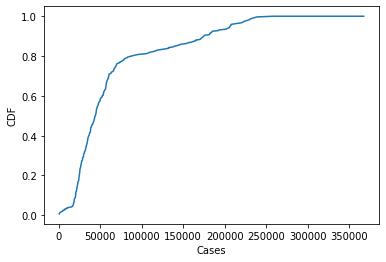

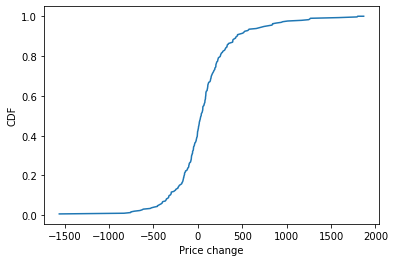

 KS statistic :  0.9863013698630171


In [420]:
######## KS 2-sample Test ##########

###### Tests for IA confirmed cases with ID confirmed cases ######

handle = 'Confirmed cases'
test_handle = 'Change'
#test_handle = 'Traveler Throughput'

# Obtaining eCDF for handles
handle_data = march_august_covid_data[handle]

test_handle_data = march_august_bitcoin_price_data[test_handle]

X1, Y1 = get_eCDF(handle_data)
X2, Y2 = get_eCDF(test_handle_data)


plt.plot(X1,Y1[2:], label = 'CDF - Daily new covid confirmed cases')
plt.xlabel("Cases")
plt.ylabel("CDF")
plt.show()
plt.plot(X2 ,Y2[2:], label = 'CDF - Bitcoin value change per day in dollors')
plt.xlabel("Price change")
plt.ylabel("CDF")
plt.show()

KS_value = KS_test_2_sample(X1,Y1, X2,Y2)

print(' KS statistic : ', KS_value)


# Reject Null Hypothesis as statistic is 0.98

Result: On calculating the 2 sample KS test. we obtained a KS- statistic of 0.9863. Which is far higher than 0.05. 
This is understandable as the bitcoin price change was negative as well though the confirmed covid cases was raising.

So we reject the null hypothesis.

##Pearson correlation:

Though it was clearly visible that the bitcoin pricing also increased during the pandemic. But we also wanted to get that done using inference methods. So we applied the pearson test to know the correlation between the covid confirmed cases and bitcoin price.

Null hypothesis H0: Covid confirmed cases and bitcoin pricing are correlated.

Alternate hypothesis H1: Covid confirmed cases and bitcoin pricing are not correlated.


In [421]:
handle = 'Confirmed cases cumulative'
test_handle = 'Closing Price'

bitcoin_price_mean = np.mean(march_august_bitcoin_price_data[test_handle])

covid_confirmed_mean = np.mean(march_august_covid_data[handle])

numer = 0
denom_x = 0 
denom_y = 0 

#print(march_august_bitcoin_price_data)
for i in range(march_august_bitcoin_price_data.shape[0]):
  
  x_minus_Xavg = np.array(march_august_bitcoin_price_data[test_handle])[i] - bitcoin_price_mean
  y_minus_Yavg = np.array(march_august_covid_data[handle])[i] - covid_confirmed_mean
  numer = numer + (x_minus_Xavg * y_minus_Yavg)

  denom_x =  denom_x + np.square(x_minus_Xavg)
  denom_y =  denom_y + np.square(y_minus_Yavg)


coeff = numer / np.sqrt(denom_x * denom_y)

print(coeff)

#as coeff is > 0.5 . They are positively correlated


0.9585374248082369


Result: On performing the Pearson correlation test we obtained a coefficient value of 0.959. As the value is far greater than 0.5. We **accept the null hypothesis** and are very confident that the rise in covid cases and bitcoin price were directly proportial and **postively correlated**.